In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load results
tool = pd.read_csv("tool_results.csv", index_col=0, parse_dates=True)
py   = pd.read_csv("pypsa_results.csv", index_col=0, parse_dates=True)

# --- Align lengths & fix year mismatch ---
T = min(len(tool), len(py))
idx = pd.date_range("2019-01-01 00:00", periods=T, freq="H")

tool = tool.iloc[:T].copy()
py   = py.iloc[:T].copy()
tool.index = idx
py.index   = idx

# --- Pick a week ---
H = 24 * 7
start = min(24 * 120, T - H)   # ~day 120, safe
sl = slice(start, start + H)
t = np.arange(H)

tool_w = tool.iloc[sl]
py_w   = py.iloc[sl]


C:\Users\jonas\AppData\Local\Temp\ipykernel_22396\629099274.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx = pd.date_range("2019-01-01 00:00", periods=T, freq="H")


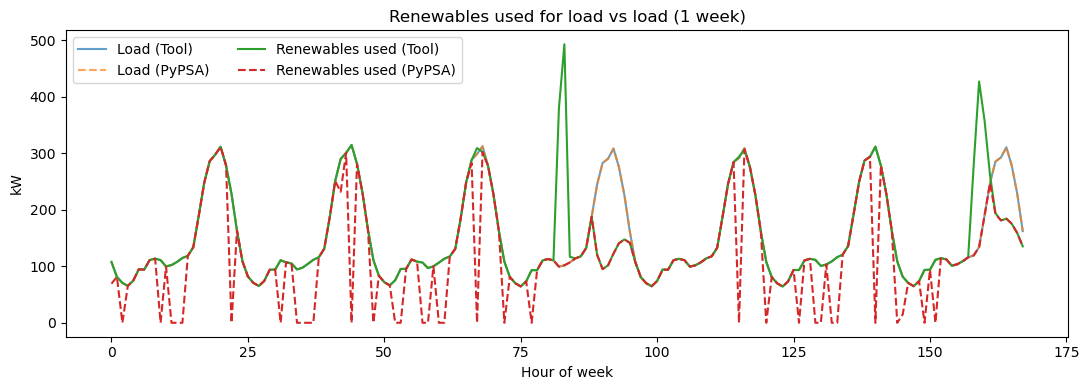

In [41]:
plt.figure(figsize=(11,4))

plt.plot(t, tool_w["load_kW"], label="Load (Tool)", alpha=0.7)
plt.plot(t, py_w["load_kW"], "--", label="Load (PyPSA)", alpha=0.7)

plt.plot(t, tool_w["ren_used_kW"], label="Renewables used (Tool)")
plt.plot(t, py_w["ren_used_for_load_kW"], "--", label="Renewables used (PyPSA)")

plt.title("Renewables used for load vs load (1 week)")
plt.ylabel("kW")
plt.xlabel("Hour of week")
plt.legend(ncol=2)
plt.tight_layout()
plt.show()


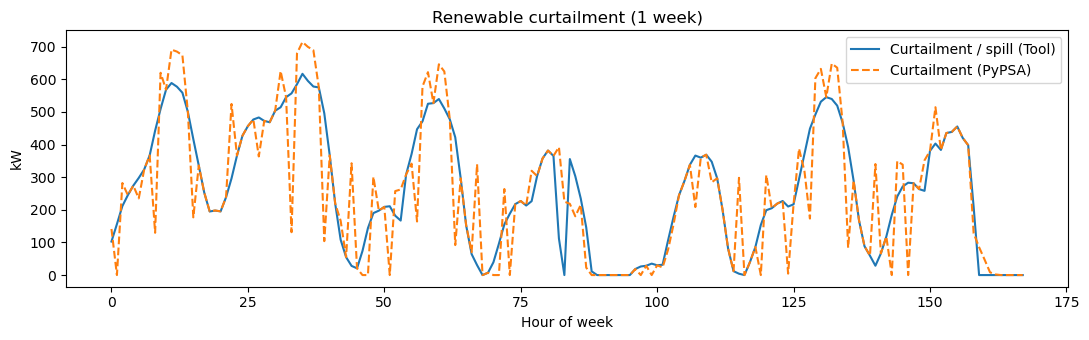

In [42]:
plt.figure(figsize=(11,3.5))

plt.plot(t, tool_w["spill_kW"], label="Curtailment / spill (Tool)")
plt.plot(t, py_w["ren_curt_kW"], "--", label="Curtailment (PyPSA)")

plt.title("Renewable curtailment (1 week)")
plt.ylabel("kW")
plt.xlabel("Hour of week")
plt.legend()
plt.tight_layout()
plt.show()


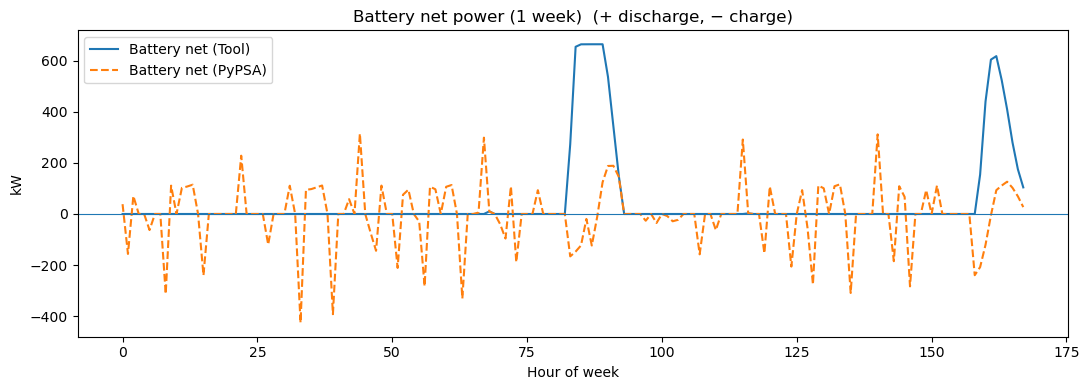

In [ ]:
plt.figure(figsize=(11,4))

plt.plot(t, tool_w["battery_net_kW"], label="Battery net (Tool)")
plt.plot(t, py_w["battery_net_kW"], "--", label="Battery net (PyPSA)")

plt.axhline(0, linewidth=0.8)

plt.title("Battery net power (1 week)  (+ discharge, − charge)")
plt.ylabel("kW")
plt.xlabel("Hour of week")
plt.legend()
plt.tight_layout()
plt.show()
